# Multicollinearity 
Multicollinearity is a statistical concept where several independent variables in a model are correlated. Two variables are considered to be perfectly collinear if their correlation coefficient is +/- 1.0. Multicollinearity among independent variables will result in less reliable statistical inferences.

This notebook is inspired by the this [notebook](https://www.kaggle.com/code/codebreaker619/multicollinearity-analysis-in-linear-regression/notebook)

Quick  Navigation
- [Example 1: Advertising Data](#example-1-advertising-data)
- [Example 2: Salary Data](#example-2-salary-data)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

## use display for html output
from IPython.display import display, HTML

# auto-reload modules
%load_ext autoreload
%autoreload 2

In [3]:
# dark mode
plt.style.use('dark_background')

## Example 1: Advertising Data

In [4]:
#loading  data
df_ads = pd.read_csv('./data/Advertising.csv')
df_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
# checking for missing values
df_ads.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
# splitting the data into features and target
indepent_vars = ['TV', 'Radio', 'Newspaper']
dependent_var = ['Sales']

x = df_ads[indepent_vars]
y = df_ads[dependent_var]


In [15]:
x = sm.add_constant(x)
x.head()


,const,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4


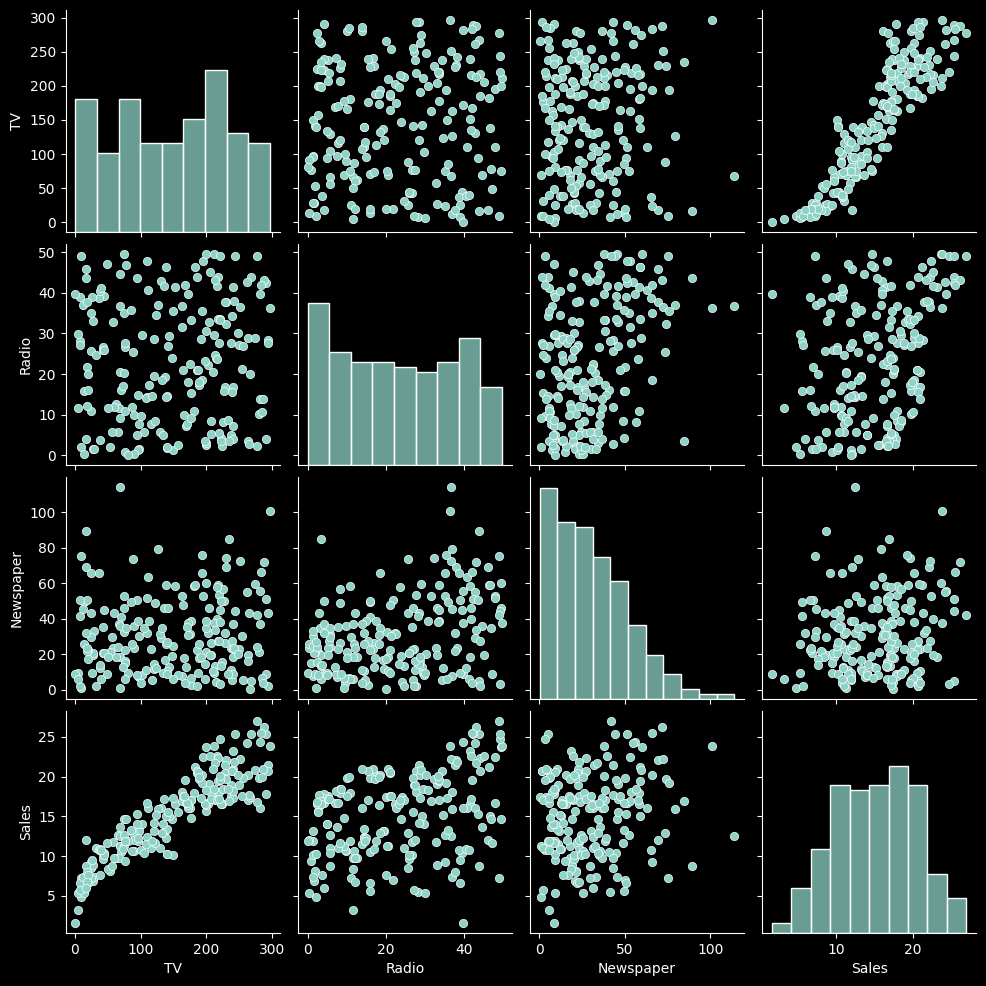

In [18]:
sns.pairplot(df_ads)

In [19]:
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 14 May 2022   Prob (F-statistic):           8.13e-99
Time:                        07:20:56   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

 Except the feature 'Newspaper' (P-value = 0.954) , all the P values are less than 0.05

- std error of const = 0.308
- std error of TV = 0.001
- std error of Radio = 0.008
- std error of Newspaper = 0.006

std error => high number(>0.5) if there is multicollinearity among the independent varibles. But here, the std error are small numbers thus indicating there is no multicollinearity among the independent variables

<AxesSubplot:>

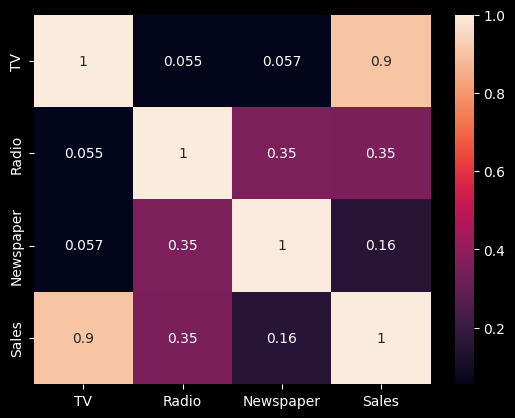

In [37]:
cm = df_ads.corr()
sns.heatmap(cm, annot=True)

## Example 2: Salary Data

In [24]:
#loading data
df_salary = pd.read_csv('./data/Salary_Data.csv')
df_salary.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [25]:
# checking for missing values
df_salary.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

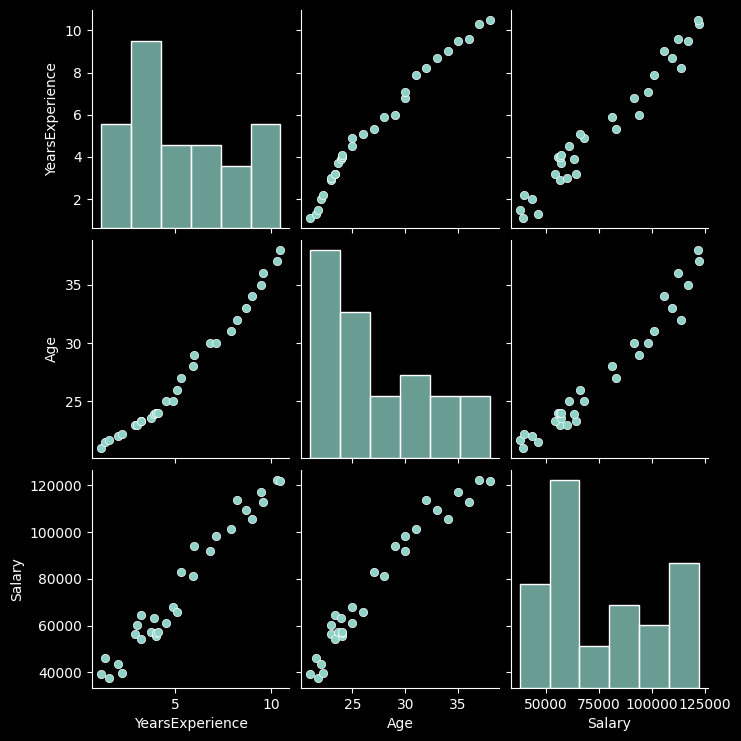

In [27]:
sns.pairplot(df_salary)

In [35]:
x = df_salary[['YearsExperience', 'Age']]
y = df_salary[['Salary']]

In [36]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sat, 14 May 2022   Prob (F-statistic):           1.35e-19
Time:                        07:30:47   Log-Likelihood:                -300.35
No. Observations:                  30   AIC:                             606.7
Df Residuals:                      27   BIC:                             610.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6661.9872   2.28e+04     

=> for Age = > the P-value is >0.05 = > Age and YearsOfExperience may have some kind of correlation

- std error of const = 0.308
- std error of YearsOfExperience = 2337.092
- std error of Age = 1285.034

Here we can see the std errors of both YearsOfExperience and Age are very very high, thus indicating that there is a huge Multicollinearity among them


<AxesSubplot:>

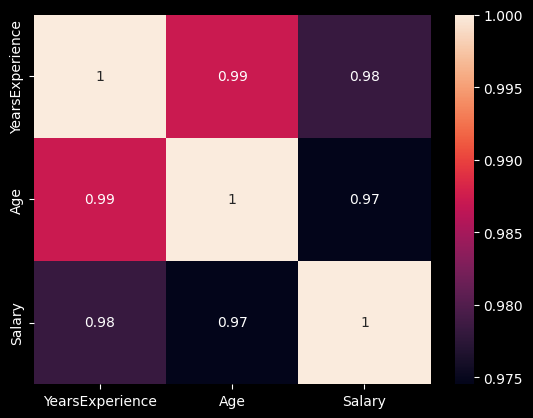

In [32]:
cm = df_salary.corr()
sns.heatmap(cm, annot=True)
